### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [9]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd
import seaborn as sns

In [10]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    plt.figure(figsize=figsize)
    level = np.arange(len(bars_length))
    plt.barh(level,bars_length, alpha=0.5, height=0.8)
    plt.yticks(ind, yticks_labels, fontsize=25)
    plt.xticks(fontsize=25)
    for i in level:
        plt.annotate(labels[i], xy=(0,0), xytext=(max(bars_length[i],0), level[i]),  ha='left' , size=25, va='center')
    plt.grid(True)
    plt.show()

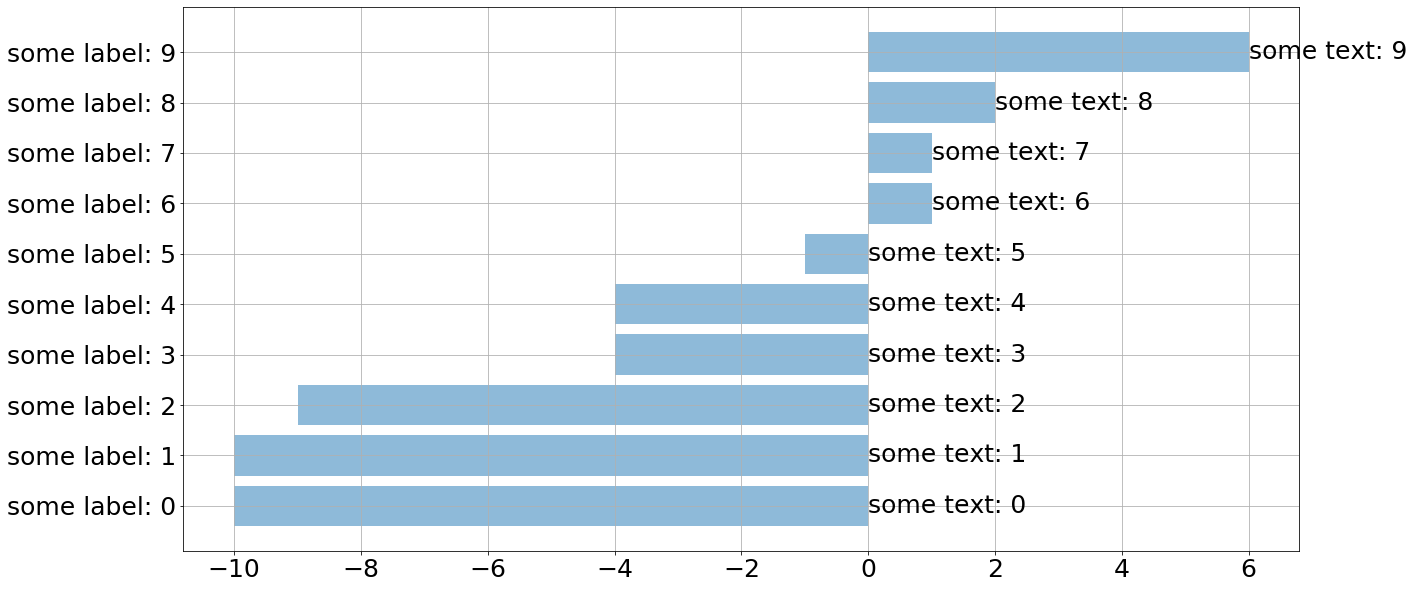

In [11]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
ind = np.arange(len(bars_length))
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [12]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    col=['#3b4cc0','#5d7ce6', '#82a6fb', '#aac7fd', '#cdd9ec', '#ead4c8', '#f7b89c', '#f18d6f', '#d95847', '#b40426']
    gr0 = 0 * probabilities_in_time[0]
    for i in probabilities_in_time.columns:
        plt.fill_between(probabilities_in_time.index, probabilities_in_time[i]+gr0, gr0, color=col[i],label=str('Probability: '+ str(i)))
        gr0 += probabilities_in_time[i]
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(loc='lower left' ,prop={'size': 16})
    plt.show()    

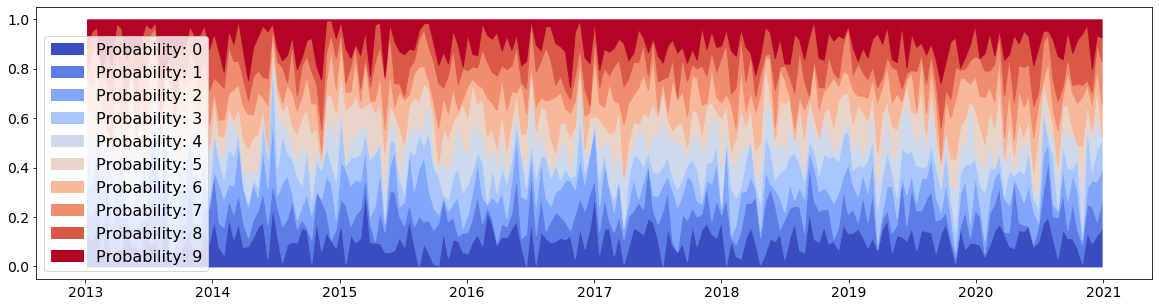

In [13]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [14]:
def plot_intraday_ts(intraday_ts, figsize):
    df = pd.DataFrame({'vremja': intraday_ts.index, 'val' : intraday_ts})
    df['d'] = df['vremja'].dt.date
    df['h'] = df['vremja'].dt.hour
    df['h'] = df['h'].astype(int)
    df['d'] = df['d'].astype(str)
    myitog=df.pivot_table(['val'], index=['h'],columns='d')
    pfig, ax = plt.subplots(figsize=figsize) 
    sns.heatmap(myitog, cmap= 'coolwarm');


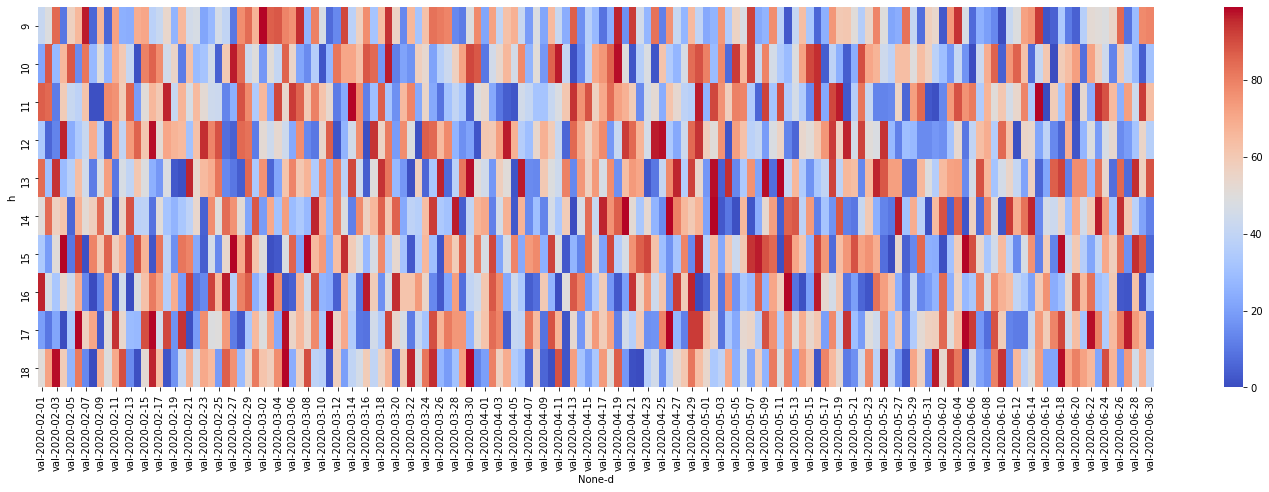

In [15]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)